In [1]:
import geopandas as gpd
import matplotlib.pyplot

In [4]:
localidades = gpd.read_file("/content/drive/MyDrive/De cero a Digital Twin en ingeniería civil/Capitulo 5/5.2 Caso de Estudio Densidad Poblacional de Bogotá/localidades.zip")
localidades.head(5)

,OBJECTID,NOMBRE,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,SANTA FE,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((100996.362 103506.019, 101013.606 10..."
1,11,PUENTE ARANDA,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((95475.458 104555.873, 95837.202 1049..."
2,13,CIUDAD BOLIVAR,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((91716.740 100390.427, 91714.771 1003..."
3,6,BARRIOS UNIDOS,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((102251.610 110024.092, 101669.946 10..."
4,2,SUBA,11,Acuerdo 8 de 1977,None,None,None,None,1.005606e+08,65665.349126,"POLYGON ((103891.168 125935.111, 103894.608 12..."


<Axes: >

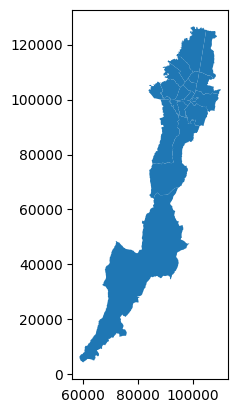

In [5]:
localidades.plot()

In [6]:
localidades = localidades.set_index("NOMBRE")

In [7]:
localidades["area"] = localidades.area
localidades.head(5)

,OBJECTID,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry,area
NOMBRE,,,,,,,,,,,
SANTA FE,1,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((100996.362 103506.019, 101013.606 10...",4.517065e+07
PUENTE ARANDA,11,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((95475.458 104555.873, 95837.202 1049...",1.731115e+07
CIUDAD BOLIVAR,13,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((91716.740 100390.427, 91714.771 1003...",1.299864e+08
BARRIOS UNIDOS,6,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((102251.610 110024.092, 101669.946 10...",1.190345e+07
SUBA,2,11,Acuerdo 8 de 1977,None,None,None,None,1.005606e+08,65665.349126,"POLYGON ((103891.168 125935.111, 103894.608 12...",1.005606e+08


In [8]:
localidades["area"]

,area
NOMBRE,
SANTA FE,4.517065e+07
PUENTE ARANDA,1.731115e+07
CIUDAD BOLIVAR,1.299864e+08
BARRIOS UNIDOS,1.190345e+07
SUBA,1.005606e+08
ANTONIO NARIÑO,4.879543e+06
CANDELARIA,2.060243e+06
ENGATIVA,3.588097e+07
FONTIBON,3.328100e+07


In [9]:
localidades["perimetro"] = localidades.boundary
localidades.head(5)

,OBJECTID,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry,area,perimetro
NOMBRE,,,,,,,,,,,,
SANTA FE,1,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((100996.362 103506.019, 101013.606 10...",4.517065e+07,"MULTILINESTRING ((100996.362 103506.019, 10101..."
PUENTE ARANDA,11,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((95475.458 104555.873, 95837.202 1049...",1.731115e+07,"LINESTRING (95475.458 104555.873, 95837.202 10..."
CIUDAD BOLIVAR,13,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((91716.740 100390.427, 91714.771 1003...",1.299864e+08,"LINESTRING (91716.740 100390.427, 91714.771 10..."
BARRIOS UNIDOS,6,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((102251.610 110024.092, 101669.946 10...",1.190345e+07,"LINESTRING (102251.610 110024.092, 101669.946 ..."
SUBA,2,11,Acuerdo 8 de 1977,None,None,None,None,1.005606e+08,65665.349126,"POLYGON ((103891.168 125935.111, 103894.608 12...",1.005606e+08,"LINESTRING (103891.168 125935.111, 103894.608 ..."


In [10]:
localidades["centroide"] = localidades.centroid
localidades.head(3)

,OBJECTID,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry,area,perimetro,centroide
NOMBRE,,,,,,,,,,,,,
SANTA FE,1,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((100996.362 103506.019, 101013.606 10...",4.517065e+07,"MULTILINESTRING ((100996.362 103506.019, 10101...",POINT (104587.385 99751.307)
PUENTE ARANDA,11,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((95475.458 104555.873, 95837.202 1049...",1.731115e+07,"LINESTRING (95475.458 104555.873, 95837.202 10...",POINT (96221.311 102214.378)
CIUDAD BOLIVAR,13,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((91716.740 100390.427, 91714.771 1003...",1.299864e+08,"LINESTRING (91716.740 100390.427, 91714.771 10...",POINT (90628.777 87412.595)


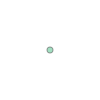

In [11]:
punto = localidades["centroide"].iloc[0]
punto

In [12]:
localidades["distancia"] = localidades["centroide"].distance(punto)
localidades["distancia"]

,distancia
NOMBRE,
SANTA FE,0.000000
PUENTE ARANDA,8721.119096
CIUDAD BOLIVAR,18630.258749
BARRIOS UNIDOS,9333.201006
SUBA,19231.446216
ANTONIO NARIÑO,7418.334999
CANDELARIA,3990.679376
ENGATIVA,14611.909834
FONTIBON,14828.435114


In [13]:
localidades["distancia"].mean()

14094.856353249023

In [14]:
localidades["distancia"].min()

0.0

In [15]:
localidades["distancia"].max()

66360.15082160218

<Axes: >

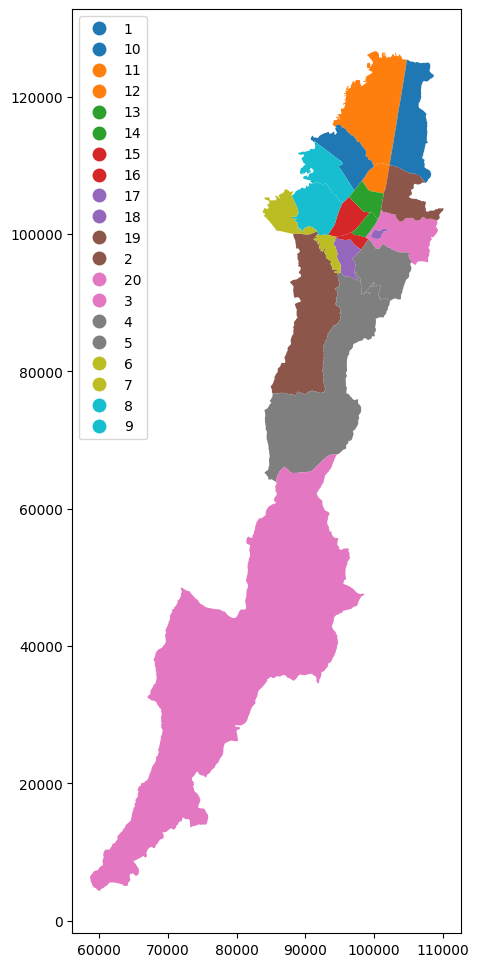

In [16]:
localidades.plot(
    column="CODIGO_LOC",
    figsize=(12,12),
    legend = True,
    legend_kwds={"loc":"upper left"}
)

In [17]:
localidad12 = localidades.query("CODIGO_LOC == '12' ")
localidad12

,OBJECTID,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry,area,perimetro,centroide,distancia
NOMBRE,,,,,,,,,,,,,,
BARRIOS UNIDOS,6,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((102251.610 110024.092, 101669.946 10...",1.190345e+07,"LINESTRING (102251.610 110024.092, 101669.946 ...",POINT (100442.088 108113.433),9333.201006


In [19]:
localidades.crs #coordinate reference system

<Projected CRS: PROJCS["PCS_CarMAGBOG",GEOGCS["GCS_CarMAGBOG",DATU ...>
Name: PCS_CarMAGBOG
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: CGS_CarMAGBOG
- Ellipsoid: GRS80 Mod
- Prime Meridian: Greenwich

In [20]:
localidades_9377 = localidades.to_crs("EPSG:9377") #Magna sirgas origen Nacional
localidades_9377.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

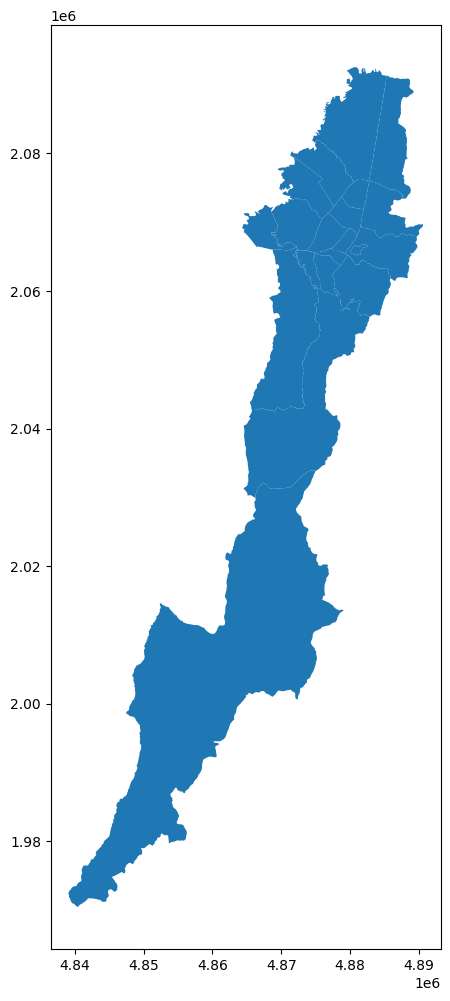

In [21]:
localidades_9377.plot(figsize=(12,12))

In [24]:
manzanas = gpd.read_file("/content/drive/MyDrive/De cero a Digital Twin en ingeniería civil/Capitulo 5/5.2 Caso de Estudio Densidad Poblacional de Bogotá/Centroides_Manzanas.geojson")
manzanas

,CODIGO_MAN,ESTRATO,CODIGO_ZON,CODIGO_CRI,NORMATIVA,FECHA_ACTO,NUMERO_ACT,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_Leng,LINK,VIV_2010,PER_S010,HOG_2010,DENSIDAD_V,DENSIDAD_P,Shape_Le_1,Shape_Area,geometry
0,00921249,2,9,544,DEC544,2009-12-17,544,None,5000,2009-12-17,322.936425,None,27.0,108.0,30.0,99.37,397.47,322.936246,2717.193691,POINT (-74.08152 4.74135)
1,00921248,2,5,544,DEC544,2009-12-17,544,None,5000,2009-12-17,175.602230,None,6.0,24.0,7.0,36.47,145.87,175.602169,1645.311119,POINT (-74.08134 4.74156)
2,00840722,6,17,544,DEC544,2009-12-17,544,None,5000,2009-12-17,858.663177,None,79.0,270.0,78.0,19.86,67.86,858.663208,39786.805154,POINT (-74.02511 4.69449)
3,006404A1,0,19,544,DEC544,2009-12-17,544,None,5000,2009-12-17,327.777988,None,0.0,0.0,0.0,0.00,0.00,327.778009,6065.962240,POINT (-74.12883 4.67724)
4,00652201,0,10,544,DEC544,2009-12-17,544,None,5000,2009-12-17,1751.712026,None,0.0,0.0,0.0,0.00,0.00,1751.711946,60476.334401,POINT (-74.14251 4.66306)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,00259106,1,2,544,DEC544,2009-12-17,544,None,5000,2009-12-17,157.854597,None,92.0,35.0,95.0,1078.53,410.31,157.854626,853.009570,POINT (-74.12377 4.49643)
45198,00259109,1,2,544,DEC544,2009-12-17,544,None,5000,2009-12-17,182.006050,None,166.0,63.0,171.0,1620.09,614.85,182.006109,1024.634835,POINT (-74.12445 4.49624)
45199,00259246,0,19,544,DEC544,2009-12-17,544,None,5000,2009-12-17,151.861522,None,0.0,0.0,0.0,0.00,0.00,151.861583,1204.376252,POINT (-74.12092 4.49517)
45200,00259221,1,2,544,DEC544,2009-12-17,544,None,5000,2009-12-17,386.908105,None,0.0,0.0,0.0,0.00,0.00,386.908081,9116.926438,POINT (-74.12086 4.49460)


In [25]:
manzanas.plot(figsize = (100, 100))

Output hidden; open in https://colab.research.google.com to view.

In [26]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.6 MB/s eta 0:00:00


In [33]:
manzanas.plot(column = "DENSIDAD_P", scheme='QUANTILES', k=3,figsize = (100, 50), legend = True )

Output hidden; open in https://colab.research.google.com to view.

In [30]:
manzanas.plot(column = "DENSIDAD_P", scheme='QUANTILES', k=5,figsize = (100, 50), legend = True )

Output hidden; open in https://colab.research.google.com to view.